<a href="https://colab.research.google.com/github/theniosoares/na/blob/main/ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import warnings

In [ ]:
road = pd.read_csv("https://raw.githubusercontent.com/theniosoares/na/master/road-chesapeake.csv", skiprows=2, header=None, delimiter=" ")
road.columns = ["r1", "r2"]
G = nx.Graph()
for row in road.iterrows():
    #G.add_edge(row[1]["asn1"], row[1]["asn2"])
    G.add_edge(row[1]["r1"], row[1]["r2"])

for n, d in G.nodes(data=True):
    G.nodes[n]["degree"] = G.degree(n)

print(road)

     r1  r2
0     7   1
1     8   1
2    11   1
3    12   1
4    13   1
..   ..  ..
165  38  33
166  39  33
167  37  34
168  36  35
169  37  35

[170 rows x 2 columns]


In [ ]:
print(G)

Graph with 39 nodes and 170 edges


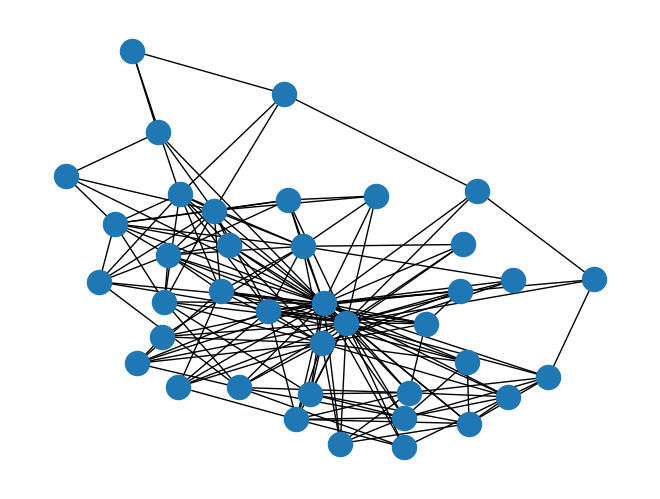

In [ ]:
nx.draw(G)
plt.show()

In [ ]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nxviz as nv
from nxviz import annotate

Matriz de adjacência

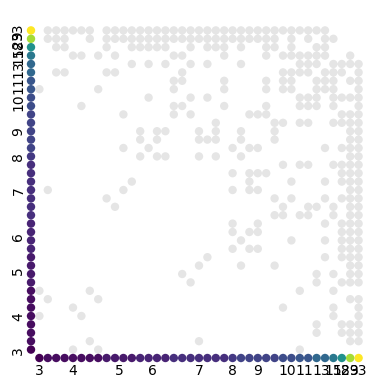

In [ ]:
nv.matrix(G, group_by="degree", node_color_by="degree")
annotate.matrix_group(G, group_by="degree")

Diametro

In [ ]:
print(nx.diameter(G))

3


Periferia

In [ ]:
print(nx.periphery(G))

[34, 37, 2, 9, 36, 14, 3, 15, 16, 17, 18, 4, 6, 5, 10, 20, 21, 24, 38, 19, 26, 25, 27, 28, 29, 32, 33, 30, 31]


Histograma de distribuição empírica

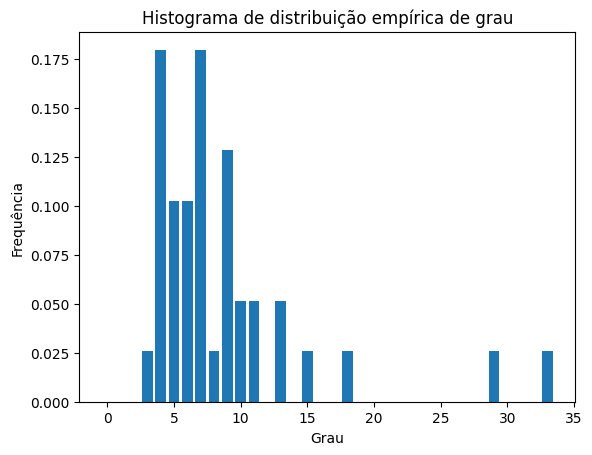

In [ ]:
dgcounts = nx.degree_histogram(G)
nodes = len(G.nodes)

dgdist = [count / nodes for count in dgcounts]
degrees = range(len(dgdist))
plt.bar(degrees, dgdist)
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.title("Histograma de distribuição empírica de grau")
plt.show()

In [ ]:
#Tentativa de passar nodes e edges para o pyvis

#from pyvis.network import Network
#from IPython.core.display import display, HTML

#net = Network(height='500px', width='100%')
#l = list(G.nodes)

#for n in l:
#  net.add_node(str(n))  #transformando em string para tentar corrigir erro

# Adicione as arestas do grafo G ao objeto Network do Pyvis
#for e in G.edges:
#  net.add_edge(e[0], e[1])
#net.show('my_graph.html')
#display(HTML('my_graph.html'))

Coeficiente de clustering de nodes escolhidos

In [ ]:
nodes = [1, 11, 23, 39]
gclust = nx.clustering(G)

local_clust = {}
for node in nodes:
    local_clust[node] = gclust[node]

print(local_clust.items())

dict_items([(1, 0.4), (11, 0.5714285714285714), (23, 0.4444444444444444), (39, 0.13446969696969696)])


Coeficiente de clustering global

In [ ]:
print(nx.average_clustering(G))

0.45023709979046234


Componentes Conectados Fortemente e Fracamente conectados podem ser observaods em grafos direcionados

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyvis

Degree centrality

In [ ]:
print(nx.degree_centrality(G))

{7: 0.2631578947368421, 1: 0.2894736842105263, 8: 0.3421052631578947, 11: 0.18421052631578946, 12: 0.23684210526315788, 13: 0.18421052631578946, 22: 0.3421052631578947, 23: 0.2631578947368421, 34: 0.07894736842105263, 35: 0.39473684210526316, 37: 0.10526315789473684, 39: 0.8684210526315789, 2: 0.2894736842105263, 9: 0.18421052631578946, 36: 0.763157894736842, 14: 0.21052631578947367, 3: 0.18421052631578946, 15: 0.23684210526315788, 16: 0.13157894736842105, 17: 0.10526315789473684, 18: 0.23684210526315788, 4: 0.10526315789473684, 6: 0.10526315789473684, 5: 0.10526315789473684, 10: 0.13157894736842105, 20: 0.10526315789473684, 21: 0.13157894736842105, 24: 0.10526315789473684, 38: 0.47368421052631576, 19: 0.23684210526315788, 26: 0.18421052631578946, 25: 0.15789473684210525, 27: 0.23684210526315788, 28: 0.15789473684210525, 29: 0.15789473684210525, 32: 0.18421052631578946, 33: 0.18421052631578946, 30: 0.15789473684210525, 31: 0.13157894736842105}


Closeness centrality

In [ ]:
print(nx.closeness_centrality(G))

{7: 0.5757575757575758, 1: 0.5846153846153846, 8: 0.6031746031746031, 11: 0.5507246376811594, 12: 0.5671641791044776, 13: 0.5507246376811594, 22: 0.6031746031746031, 23: 0.5757575757575758, 34: 0.3917525773195876, 35: 0.6229508196721312, 37: 0.4175824175824176, 39: 0.8837209302325582, 2: 0.5757575757575758, 9: 0.5428571428571428, 36: 0.7916666666666666, 14: 0.5428571428571428, 3: 0.5277777777777778, 15: 0.5507246376811594, 16: 0.5205479452054794, 17: 0.5135135135135135, 18: 0.5507246376811594, 4: 0.5205479452054794, 6: 0.5205479452054794, 5: 0.5205479452054794, 10: 0.5277777777777778, 20: 0.5135135135135135, 21: 0.5205479452054794, 24: 0.5135135135135135, 38: 0.5846153846153846, 19: 0.5507246376811594, 26: 0.5352112676056338, 25: 0.5277777777777778, 27: 0.5507246376811594, 28: 0.5277777777777778, 29: 0.5277777777777778, 32: 0.5352112676056338, 33: 0.5352112676056338, 30: 0.5277777777777778, 31: 0.5205479452054794}


Betweenness centrality

In [ ]:
print(nx.betweenness_centrality(G))

{7: 0.006683722473196156, 1: 0.050475200475200474, 8: 0.026075556281505936, 11: 0.0035583588215167164, 12: 0.009914038726799529, 13: 0.0036314403389379833, 22: 0.024242132002261225, 23: 0.010918281836305797, 34: 0.0011853959222380274, 35: 0.04850100559482709, 37: 0.00466820203662309, 39: 0.3408661232459859, 2: 0.005608529292739819, 9: 0.001195469616522248, 36: 0.20490490490490493, 14: 0.004141735720683089, 3: 0.0034308744835060624, 15: 0.0058513400618663775, 16: 0.0008621403358245463, 17: 0.0008094560726139673, 18: 0.006230666756982546, 4: 0.013390458127300232, 6: 0.000583579530947952, 5: 0.014187408924251025, 10: 0.00031827663406610776, 20: 0.000703367044731966, 21: 0.0009878620660690926, 24: 0.000703367044731966, 38: 0.05425726478358058, 19: 0.009042345120552147, 26: 0.0031272194685843897, 25: 0.0019418235463463625, 27: 0.007041660225130409, 28: 0.0020086196657740606, 29: 0.0019418235463463625, 32: 0.002610537372954925, 33: 0.0023234081384572703, 30: 0.0010431805424402005, 31: 0.0005

Eigenvector centrality

In [ ]:
print(nx.eigenvector_centrality(G))

{7: 0.15847043012778345, 1: 0.16331429417192814, 8: 0.20076771090174989, 11: 0.1403666751519149, 12: 0.17165715269597087, 13: 0.14631041145198512, 22: 0.2209495911265251, 23: 0.18613518494319473, 34: 0.022889935146821465, 35: 0.2048024253472723, 37: 0.04045123523810391, 39: 0.3846358242084886, 2: 0.20002557867157075, 9: 0.13964847155714408, 36: 0.34572195736086525, 14: 0.13102195104250777, 3: 0.11596653974927569, 15: 0.14465032450703685, 16: 0.10110602260599019, 17: 0.08005802217565366, 18: 0.1459443472902864, 4: 0.07401472886364471, 6: 0.07022352450623402, 5: 0.05937348919621227, 10: 0.11095926296113177, 20: 0.10056829765361028, 21: 0.11291771534183105, 24: 0.10056829765361028, 38: 0.2250000830021762, 19: 0.1566690446526164, 26: 0.1347116485305121, 25: 0.11977947871583992, 27: 0.15930946197377588, 28: 0.12630406759711793, 29: 0.11977947871583992, 32: 0.1411802065631186, 33: 0.14196642863959621, 30: 0.13237356881478896, 31: 0.1146049570138442}


Assortatividade geral da rede

In [ ]:
print(nx.degree_assortativity_coefficient(G))

-0.3757827510643483
